In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

In [31]:
mtafare = np.load("MTA_Fare.npy")

In [33]:
mtafare.shape

(600, 23, 194)

In [32]:
mtafare[0][2]

array([203, 276, 245, 280, 265, 241, 278, 236, 258, 264, 214, 267, 230,
       294, 258, 261, 223, 217, 204, 210, 226, 204, 204, 232, 214, 205,
       214, 282, 215, 210, 146, 146, 234, 238, 199, 167, 185, 240, 251,
       232, 235, 231, 271, 244, 268, 288, 283, 311, 303, 322, 293, 311,
       243, 266, 315, 295, 294, 338, 284, 269, 298, 334, 317, 291, 292,
       226, 291, 308, 296, 291, 326, 298, 318, 309, 300, 327, 345, 260,
       330, 289, 322, 288, 281, 296, 327, 276, 265, 286, 326, 285, 269,
       291, 320, 292, 328, 200, 324, 327, 319, 342, 338, 325, 276, 324,
       332, 324, 307, 329, 332, 303, 303, 296, 289, 230, 256, 271, 236,
       277, 263, 259, 246, 232, 271, 260, 227, 228,  40,   0,  -1,  -1,
         0,  76,  90, 110, 110, 128, 157, 136, 132, 109, 139, 121, 124,
       135, 153, 166, 140, 143, 156, 193, 181, 212, 220, 221, 249, 174,
       246, 253, 211, 170, 191, 225, 269, 204, 220, 212, 194, 191, 201,
       187, 210, 150, 223, 170, 199, 223, 229, 182, 201, 192, 19

In [34]:
swipes = mtafare.astype('float')

In [36]:
for w, week in enumerate(swipes):
    for k, kind in enumerate(week):
        for v, value in enumerate(kind):
            if value == -1:
                swipes[w][k][v] = np.nan

## Task 1

Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [56]:
station_swipes = np.nansum(swipes, axis=1)

In [57]:
station_swipes.shape

(600, 194)

In [58]:
station_swipes = np.nansum(station_swipes, axis=0)

In [59]:
station_swipes.shape

(194,)

In [64]:
print ("mean deaths by day {:.2f}".format(station_swipes.mean()))
print ("stdev deaths by day {:.2f}".format(station_swipes.std()))
thresholds = [station_swipes.mean() + 3 * station_swipes.std(), 
              station_swipes.mean() - 3 * station_swipes.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

mean deaths by day 29781349.87
stdev deaths by day 2983960.42
3-sigma thresholds 38733231.14 20829468.61


In [84]:
weeks = range(0,len(station_swipes))

In [100]:
week_range = pd.date_range('05/28/2010', periods=len(station_swipes), freq='w-fri')

In [101]:
stationDf = pd.DataFrame(index=week_range , data=station_swipes)

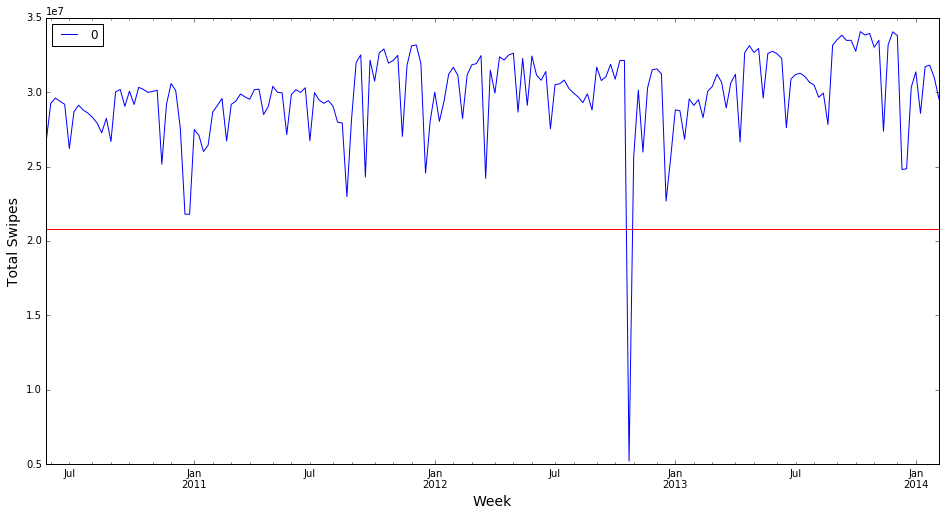

In [113]:
ax = stationDf.plot(figsize=(16, 8))

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color="red")

ax.set_xlabel("Week", fontsize=14)
ax.set_ylabel("Total Swipes", fontsize=14)

### Figure 1: Number of MetroCard swipes throughout the MTA over the course of 194 weeks starting 05/28/2010

In [114]:
# Find the amount
stationDf[stationDf[0] < thresholds[1]]

,0
2012-10-26,5218686.0


There is an outlier on the week of October 26th, which in New York City, makes a lot of sense, as it is the week that Hurricane Sandy hit the city.  
[Source](https://en.wikipedia.org/wiki/Hurricane_Sandy).

## Task 2
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [258]:
type_swipes = np.nanmean(swipes, axis=0)

/Users/pichot/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [262]:
type_swipes.shape

(23, 194)

In [263]:
type_swipes

array([[  2.48801190e+04,   2.71732299e+04,   2.75737084e+04, ...,
          2.85489394e+04,   2.69994730e+04,   2.69695823e+04],
       [  1.14832035e+03,   1.26579826e+03,   1.26607775e+03, ...,
          1.50461905e+03,   1.44757667e+03,   1.47077273e+03],
       [  1.03465368e+02,   1.11683297e+02,   1.11524838e+02, ...,
          1.27209957e+02,   1.22084233e+02,   1.19463203e+02],
       ..., 
       [  1.32640693e+01,   1.32754881e+01,   1.40172786e+01, ...,
          1.16839827e+01,   1.24384449e+01,   1.33852814e+01],
       [  7.74891775e-01,   1.02819957e+00,   1.00431965e+00, ...,
          1.86580087e+00,   1.74946004e+00,   1.77489177e+00],
       [             nan,              nan,              nan, ...,
          2.45178139e+03,   2.97927214e+03,   1.15804762e+03]])

In [212]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [264]:
typeDf = pd.DataFrame(type_swipes).T

In [265]:
typeDf.columns = ridetype

14d
adjusted r2: 0.831982169954
coefficient: 2.37215247609
7d
adjusted r2: 0.845739239012
coefficient: 23.0838099453
month
adjusted r2: 0.885513942602
coefficient: -0.64260916205
rr
adjusted r2: 0.970411443096
coefficient: 1.3373565163
sen
adjusted r2: 0.969705721286
coefficient: 0.735725653879
tcmc
adjusted r2: 0.67730528923
coefficient: 0.977238565635


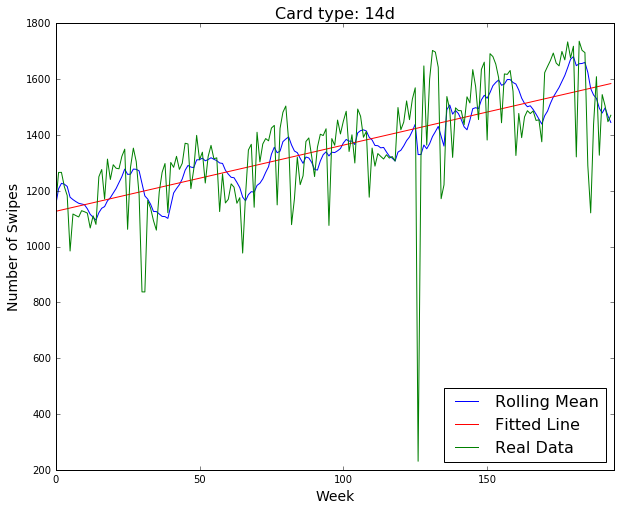

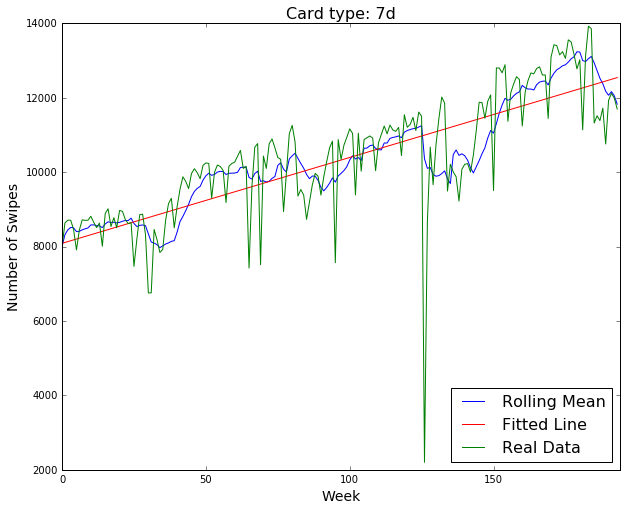

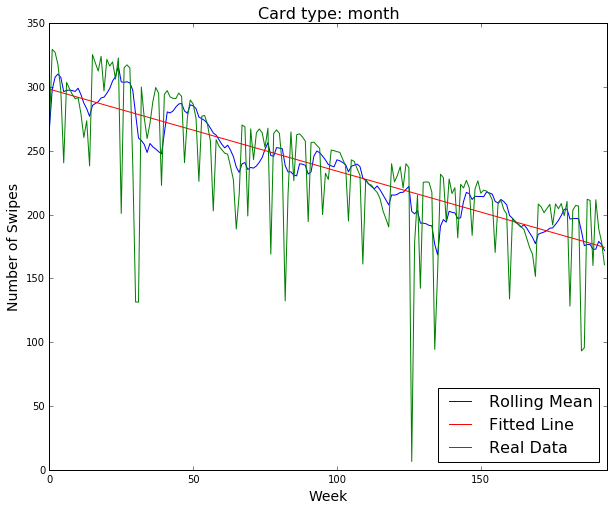

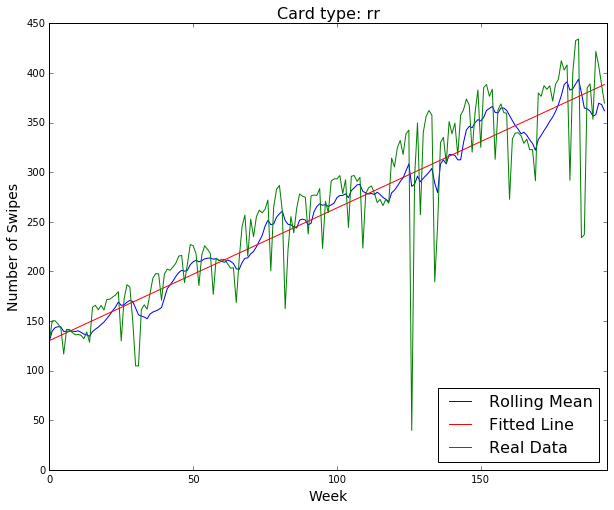

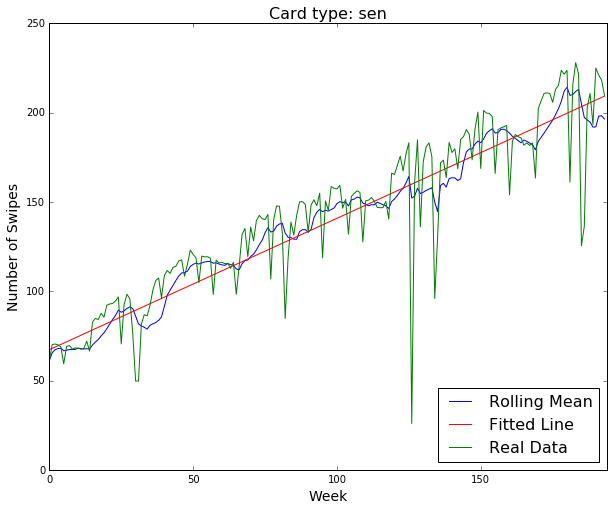

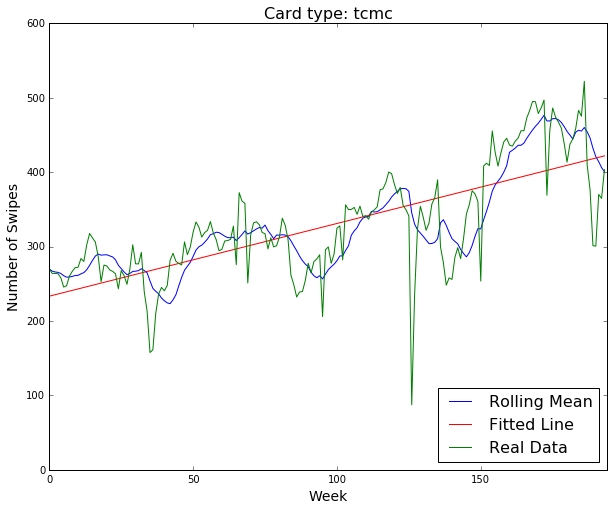

In [275]:
for swipeType in typeDf.columns:    
    rolling = typeDf[swipeType].rolling(min_periods=1, window=10).mean()
    
    res = sm.OLS(rolling, sm.add_constant(typeDf.index.values)).fit()
    
    r2 = res.rsquared_adj
    coe = res.params['x1']
    
    if (r2 > 0.6) and (coe > 0.5 or coe < -0.5):
        f, ax = plt.subplots(figsize=(10, 8))

        ax.plot(typeDf.index, rolling, label="Rolling Mean")
        ax.plot(typeDf.index, res.predict(sm.add_constant(typeDf.index.values)), "r-", label="Fitted Line")
        ax.plot(typeDf.index, typeDf[swipeType], label="Real Data")

        ax.set_xlabel("Week", fontsize=14)
        ax.set_ylabel("Number of Swipes", fontsize=14)
        ax.set_title("Card type: " + swipeType, fontsize=16)
        ax.set_xlim([0,194])
        ax.legend(loc=4, fontsize=16)
        
        print(swipeType)
        print("adjusted r2:", r2)
        print("coefficient:", coe)

### Figure 2: Six card types with whose 10-week rolling mean OLS is greater than 0.6 and coefficient, positive or negative, is greater than 0.5.

In [362]:
# Sum instead of average
totalDf = pd.DataFrame(np.nansum(swipes, axis=0)).T
totalDf.columns = ridetype

In [404]:
# Take the six card types with significant trends
significantTypes = totalDf.loc[:, ['14d', '7d', 'month', 'rr', 'sen', 'tcmc']]

firstTenTotal = totalDf.T.iloc[:, :10].sum().sum()
lastTenTotal = totalDf.T.iloc[:, -10:].sum().sum()

firstTen = significantTypes.iloc[:10, :].sum() / firstTenTotal
lastTen = significantTypes.iloc[-10:, :].sum() / lastTenTotal

In [406]:
lastTen

14d      0.022428
7d       0.183626
month    0.002668
rr       0.005618
sen      0.003049
tcmc     0.006219
dtype: float64

In [407]:
firstTen

14d      0.018677
7d       0.137763
month    0.004808
rr       0.002259
sen      0.001093
tcmc     0.004232
dtype: float64

In [410]:
# Percent change
((lastTen - firstTen) / firstTen) * 100

14d       20.086422
7d        33.291651
month    -44.494337
rr       148.692570
sen      179.042250
tcmc      46.961174
dtype: float64

Looking at the six card types with significant trends identified above, I then looked at the ratio of usage between the first 10 weeks and the last 10 weeks of our time range. The ratio per week was calculated as the product of the total swipes per card type divided by the total number of swipes that week.

The percentages below were calculated by looking at the percent increase/decrease from the ratio of the first 10 weeks compared to the last 10 weeks. This gives us an indication of the size of change in usage of the card type relative to the total system usage.

- 14-day: 20.1% increase
- 7-day: 33.3% increase
- monthly: -44.5% decrease
- rr: 148.7% increase
- sen: 179% increase
- tcmc: 47% increase

## Task 3
Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [515]:
station_swipes = np.nansum(swipes, axis=1)

In [487]:
year1 = np.nansum(station_swipes[:52], axis=1)
year2 = np.nansum(station_swipes[52:104], axis=1)
year3 = np.nansum(station_swipes[104:156], axis=1)

In [453]:
stationTotals = np.nansum(station_swipes, axis=1)

In [440]:
np.abs(np.fft.rfft(station_swipes.reshape((194, 600))[:52]))


In [508]:
station_swipes[:52]

array([[ 126878.,   37306.,    6606., ...,       0.,       0.,       0.],
       [ 149477.,   46464.,    6881., ...,       0.,       0.,       0.],
       [ 152383.,   49359.,    7229., ...,       0.,       0.,       0.],
       ..., 
       [ 135130.,   44996.,    6289., ...,       0.,       0.,       0.],
       [ 141245.,   44059.,    7160., ...,       0.,       0.,       0.],
       [ 135858.,   39568.,    7300., ...,       0.,       0.,       0.]])

0 2980160.6356
150 2931895.87695
194 2950388.92921
327 2402218.58096


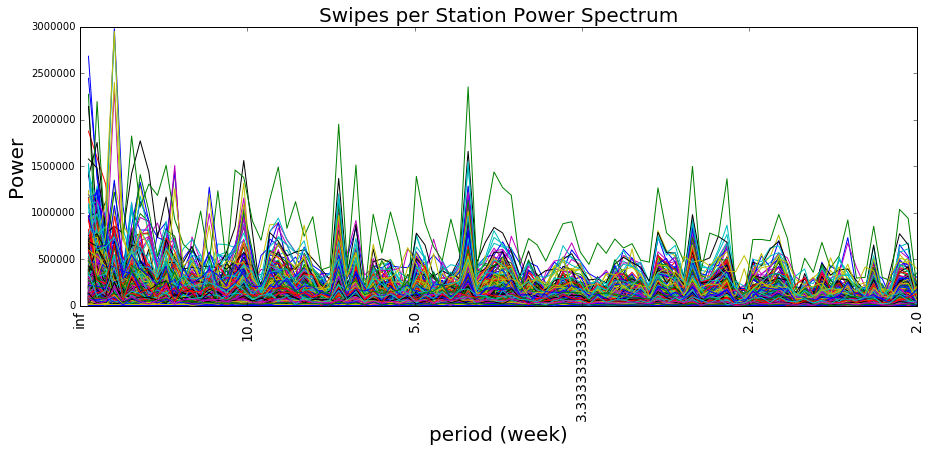

In [575]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)

plt.xlabel("period (week)", fontsize=20)
plt.ylabel("Power", fontsize=20)
plt.title("Swipes per Station Power Spectrum", fontsize=20)

for idx, station in enumerate(station_swipes):
    f = np.abs(np.fft.rfft(station))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f[1:]), '-')
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=14, rotation=90)
    
    if f[4] > 2400000:
        print(idx, f[4])

### Figure 3: Fourier Power Spectrum of 600 stations over a period of 194 weeks

In [567]:
# Identify the location the fourier array where the 52 week periods sits
np.fft.rfftfreq(194, 1.0)[4]

0.020618556701030927

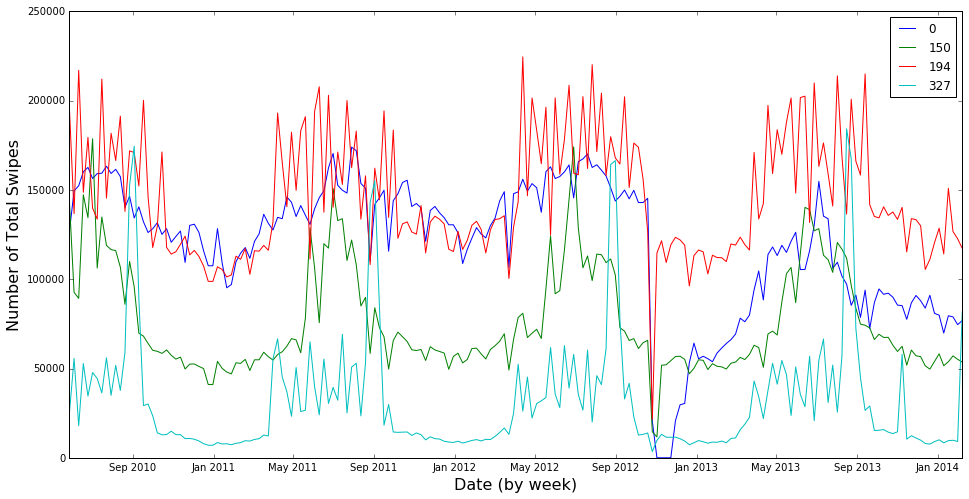

In [590]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
ax.set_xlabel("Date (by week)", fontsize=16)
ax.set_ylabel("Number of Total Swipes", fontsize=16)

for x in [0, 150, 194, 327]:
    ax.plot(week_range, station_swipes[x], label=x)
    
ax.legend()

### Figure 4: Swipes for 4 stations with highest yearly periodicity

The 4 stations identified with high yearly periodicity are indexes `0, 150, 194, 327`. These stations see a sharp drop in usage starting in the fall, around September/October, and have low ridership through the winter, and begin picking up around April/May. This a clear seasonality over winter. Without digging into the exact details of these stations, my speculation is that they are ferry service stations where people would want to avoid riding on a cold boat during the winter months.